In [8]:
#### Import libraries:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
#### Finding relationships between top skiers, social following, and sponsorships:

In [5]:
# Load final.csv for analysis
final = pd.read_csv('final.csv')

# Provides count, mean, std, min, max, and quartiles for numeric columns.
final.describe()

,CompetitorID,HPpos,HPpoints,FollowerCount,SponsorCount
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,212607.000000,10.500000,596.945000,18801.800000,4.900000
std,33260.635218,8.708234,307.225286,22799.479949,3.446415
min,163159.000000,1.000000,180.950000,1108.000000,0.000000
25%,187695.750000,4.500000,372.037500,2471.750000,2.500000
50%,218921.000000,8.500000,574.800000,6378.000000,4.500000
75%,236103.250000,14.500000,832.625000,26896.750000,5.750000
max,257311.000000,30.000000,1000.000000,64585.000000,11.000000


Correlation between Sponsor Count, HP Points, and Follower Count:
                SponsorCount  HPpoints  FollowerCount
SponsorCount       1.000000  0.688188       0.588481
HPpoints           0.688188  1.000000       0.746530
FollowerCount      0.588481  0.746530       1.000000


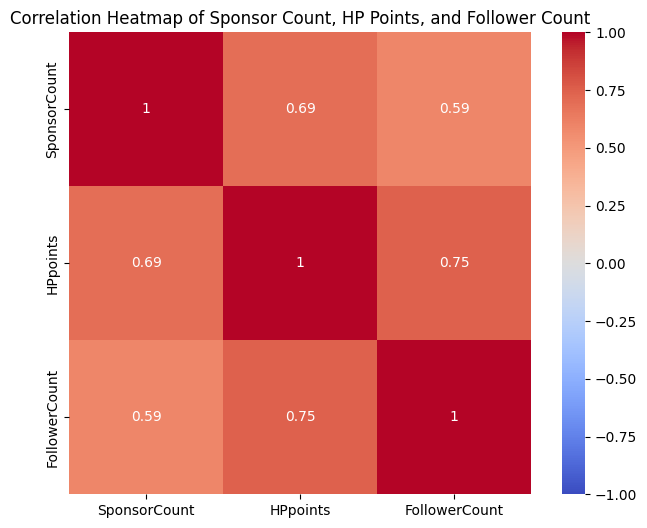

In [56]:
# Calculate Correlations between SponsorCount, HPpoints, and FollowerCount: 

## This shows relationships between sponsorship count, points, and social media following
correlation_matrix = final[['SponsorCount', 'HPpoints', 'FollowerCount']].corr()
print("Correlation between Sponsor Count, HP Points, and Follower Count:\n", correlation_sponsors)

## Create a heatmap with seaborn
plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation Heatmap of Sponsor Count, HP Points, and Follower Count')
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_95764/2161687329.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SponsorCount', y='Competitorname', data=sorted_sponsor_counts, palette='coolwarm')


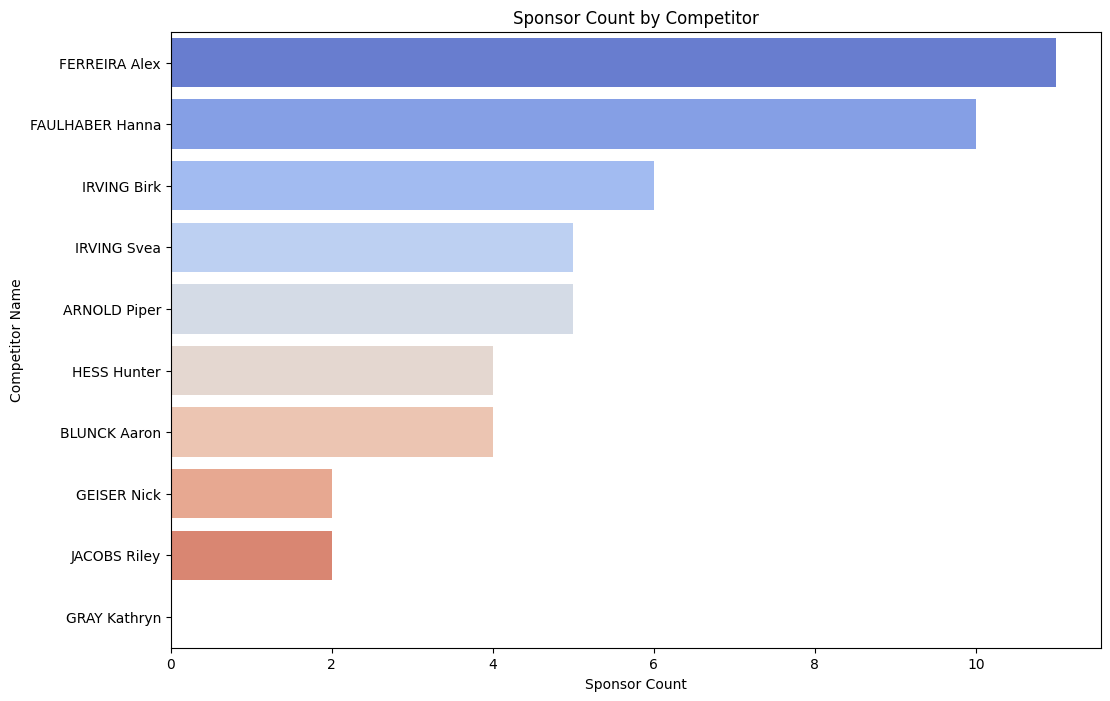

In [65]:
# Sort by SponsorCount to find competitors with the most sponsors:
sorted_sponsor_counts = final.sort_values(by='SponsorCount', ascending=False)
sorted_sponsor_counts.reset_index(drop=True, inplace=True)
sorted_sponsor_counts

plt.figure(figsize=(12, 8))
sns.barplot(x='SponsorCount', y='Competitorname', data=sorted_sponsor_counts, palette='coolwarm')
plt.title('Sponsor Count by Competitor')
plt.xlabel('Sponsor Count')
plt.ylabel('Competitor Name')
plt.savefig('Sponsorship_by_athlete.png', dpi=300, bbox_inches='tight')
plt.show()

Frequency of Each Sponsor:
 Sponsors
Marker                         4
Dalbello                       4
Volkl                          4
POC                            2
Giro                           2
Monster Army                   2
FlyLow Gear                    2
Winter Park Resort             2
Smith                          2
K2                             2
Toyota                         2
Monster Energy                 2
Rockstar Energy                2
Aspen Snowmass                 2
USANA                          2
Auclair                        1
Shred                          1
Head                           1
Dragon Alliance                1
Oakley                         1
Level  Gloves                  1
Red Bull                       1
Columbia Sportswear            1
Kappa                          1
Full Tilt                      1
Tyrolia                        1
The W Aspen Hotel              1
The Snowmass Mountain Club     1
No Sponsor                     1
Name: 

/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_95764/4134701052.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sponsor_counts.index, y=sponsor_counts.values, palette='viridis')


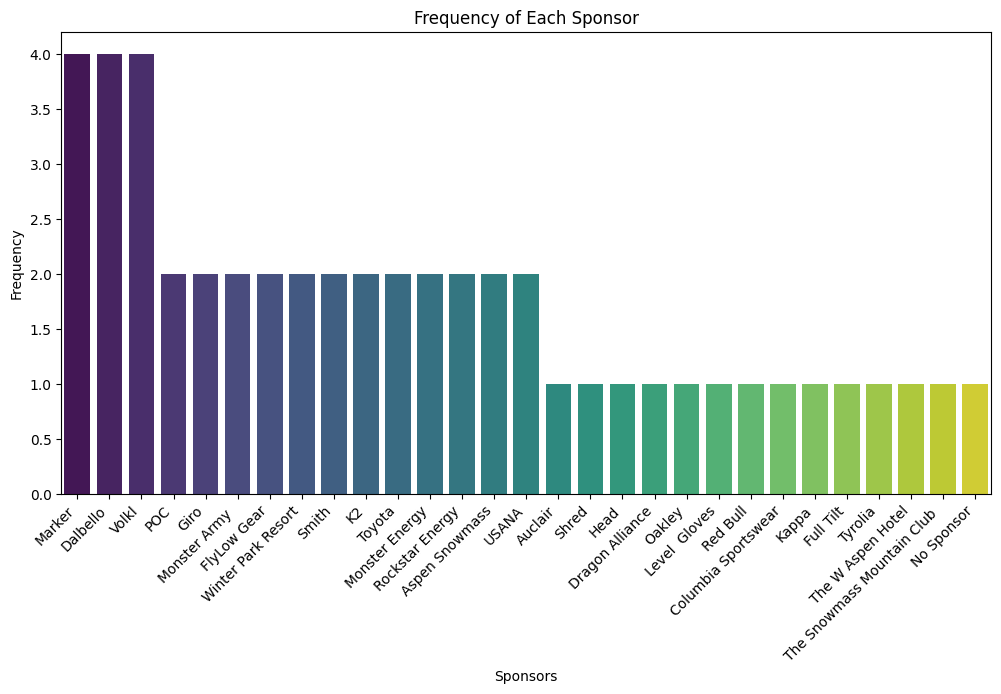

In [67]:
# Analyze Sponsor Frequency (Counting occurrences of each sponsor to find the most common sponsors):
all_sponsors = sorted_sponsor_counts['Sponsors'].str.split(', ').explode()
sponsor_counts = all_sponsors.value_counts()
print("Frequency of Each Sponsor:\n", sponsor_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=sponsor_counts.index, y=sponsor_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability
plt.title('Frequency of Each Sponsor')
plt.xlabel('Sponsors')
plt.ylabel('Frequency')
plt.savefig('Sponsor_frequency.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Identify Gender-Specific Sponsors:

#Adding a new column 'SponsorList' to contain the list of sponsors for each competitor:
final['SponsorList'] = final['Sponsors'].str.split(', ')

In [ ]:
# Extracting unique sponsors for male and female competitors separately.

In [73]:
male_sponsors = final[final['Gender'] == 'M']['SponsorList'].explode().unique()
female_sponsors = final[final['Gender'] == 'W']['SponsorList'].explode().unique()
male_only_sponsors = set(male_sponsors) - set(female_sponsors)
female_only_sponsors = set(female_sponsors) - set(male_sponsors)
print("Sponsors exclusive to male competitors:\n", male_only_sponsors)
print("Sponsors exclusive to female competitors:\n", female_only_sponsors)

Sponsors exclusive to male competitors:
 {'Dragon Alliance', 'The W Aspen Hotel', 'Red Bull', 'Tyrolia', 'Head', 'POC', 'Level  Gloves', 'Rockstar Energy', 'The Snowmass Mountain Club ', 'Full Tilt', 'Columbia Sportswear'}
Sponsors exclusive to female competitors:
 {'FlyLow Gear', 'No Sponsor', 'Kappa', 'Auclair', 'Monster Energy', 'Oakley', 'Shred'}


/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_95764/1884511894.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='FollowerCount', data=final, palette='pastel')


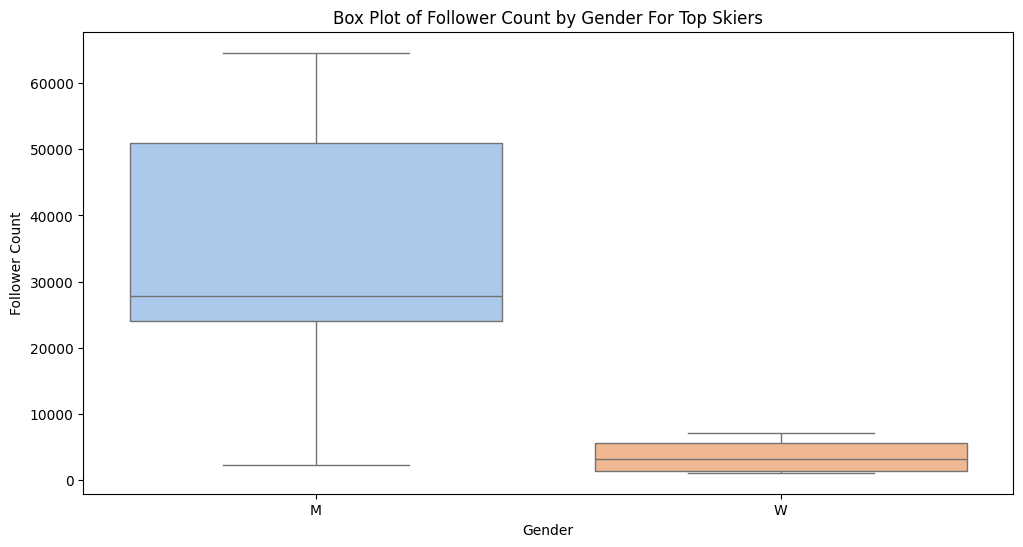

In [76]:
# Analyzing follower count by gender for top skiers:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='FollowerCount', data=final, palette='pastel')
plt.title('Box Plot of Follower Count by Gender For Top Skiers')
plt.xlabel('Gender')
plt.ylabel('Follower Count')
plt.savefig('Followers_by_Gender_Top_Skiers.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_96855/4207479074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='SponsorCount', data=final, palette='pastel')


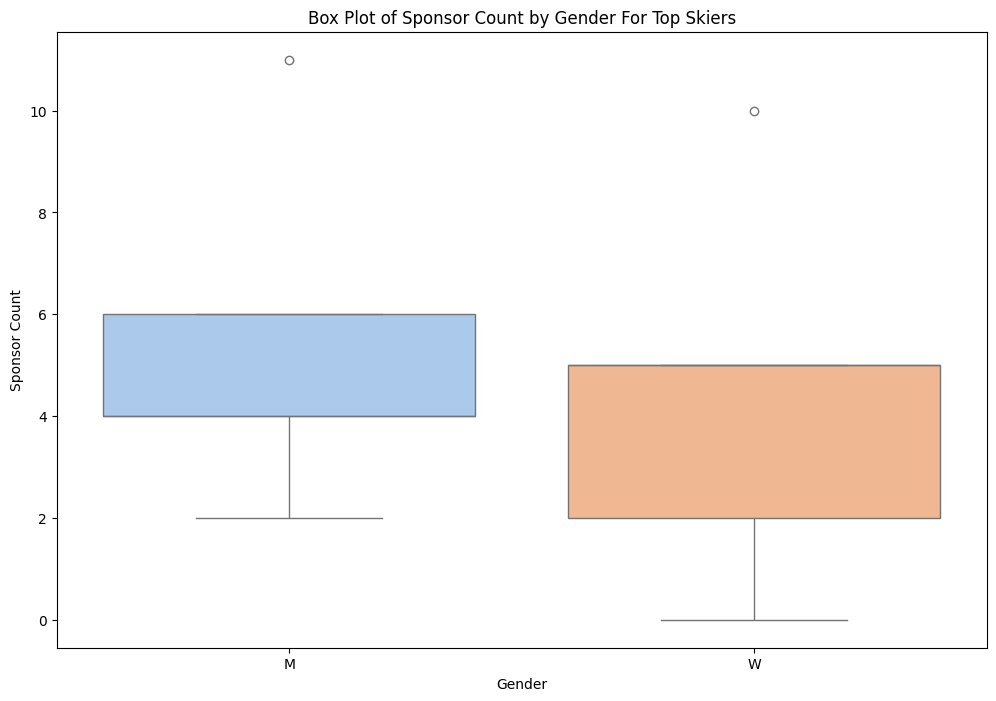

In [9]:
# Analyzing sponsor count by gender for top skiers:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='SponsorCount', data=final, palette='pastel')
plt.title('Box Plot of Sponsor Count by Gender For Top Skiers')
plt.xlabel('Gender')
plt.ylabel('Sponsor Count')
plt.savefig('SponsorCount_by_Gender_Top_Skiers.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_95764/2456084079.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='HPpoints', data=final, palette='pastel')


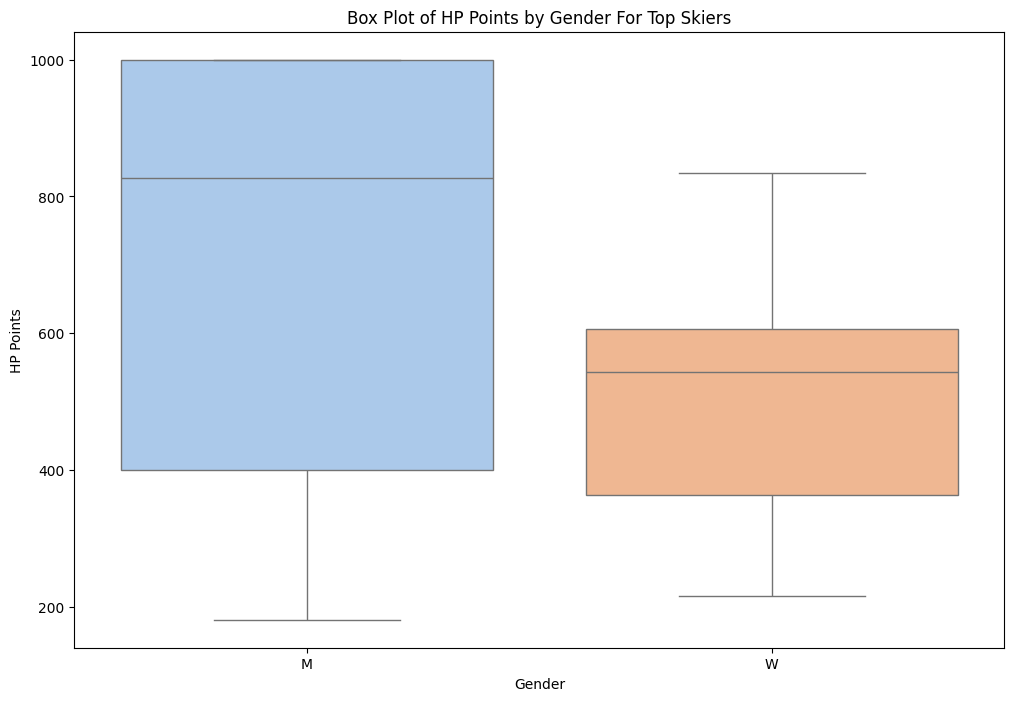

In [80]:
# Analyzing HP points by gender for top skiers:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='HPpoints', data=final, palette='pastel')
plt.title('Box Plot of HP Points by Gender For Top Skiers')
plt.xlabel('Gender')
plt.ylabel('HP Points')
plt.savefig('HPpoints_by_Gender_Top_Skiers.png', dpi=300, bbox_inches='tight')
plt.show()

In [49]:
# Calculate Average Sponsor Count by Gender:

gender_sponsor_count = final.groupby('Gender')['SponsorCount'].mean()
print("Average Sponsor Count by Gender:\n", gender_sponsor_count)

Average Sponsor Count by Gender:
 Gender
M    5.4
W    4.4
Name: SponsorCount, dtype: float64


In [50]:
# Calculate Average HP Points by Gender:
points = final.groupby('Gender')['HPpoints'].mean()
print("Average HP Points by Gender:\n", points)

Average HP Points by Gender:
 Gender
M    681.39
W    512.50
Name: HPpoints, dtype: float64


In [38]:
points = final.groupby('Gender')['HPpoints'].mean()
points

Gender
M    681.39
W    512.50
Name: HPpoints, dtype: float64

In [52]:
# Identify High-Following, Low-Performance Competitors:

# Defining thresholds for followers and points based on quartiles.
follower_threshold = final['FollowerCount'].quantile(0.75)
performance_threshold = final['HPpoints'].quantile(0.25)
large_following_low_performance = final[(final['FollowerCount'] > follower_threshold) & (final['HPpoints'] < performance_threshold)]
print("Competitors with High Following and Low Performance:\n", large_following_low_performance)

## RESULT: none exist --> low performance = low following

Competitors with High Following and Low Performance:
 Empty DataFrame
Columns: [CompetitorID, Competitorname, HPpos, HPpoints, Nationcode, Gender, InstagramHandle, FollowerCount, DateChecked, Sponsors, SponsorCount, Skiclub, SponsorList]
Index: []
